In [184]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl 

# Use std::vector when number of
#items is unknown before-wise
##include <vector> to use std::vector

Vector is implemented as a dynamic table
Access stored items just like in std::array
Remove all elements: vec.clear()
Add a new item in one of two ways:
vec.emplace_back(value) [preferred, c++11]
vec.push_back(value) [historically better known]
Use it! It is fast and flexible!
Consider it to be a default container to
store collections of items of any same type
10

In [42]:
%%writefile class.cpp
#include <string>
#include <vector>
#include <iostream>
 using namespace std;
 int main() {
 vector <int> numbers = {1, 2, 3};
 vector <string > names = {"Igor", "Cyrill"};
 names.push_back("another_string");
 cout << "First name: " << names.front() << endl;
 cout << "Last number: " << numbers.back() << endl;

 #range for loop with auto keyword
 for(auto name : names ) {
     cout << name << endl; 
 }
 return 0; 
 }


Overwriting class.cpp


In [47]:
%%shell
g++ class.cpp -o class
./class
rm class class.cpp

class.cpp:12:3: error: invalid preprocessing directive #range
  #range for loop with auto keyword
   ^~~~~
First name: Igor
Last number: 3
Igor
Cyrill
another_string


Function Delcraration : 
- can be seprate from the implementation 
- make sure to pass large objects by reference 
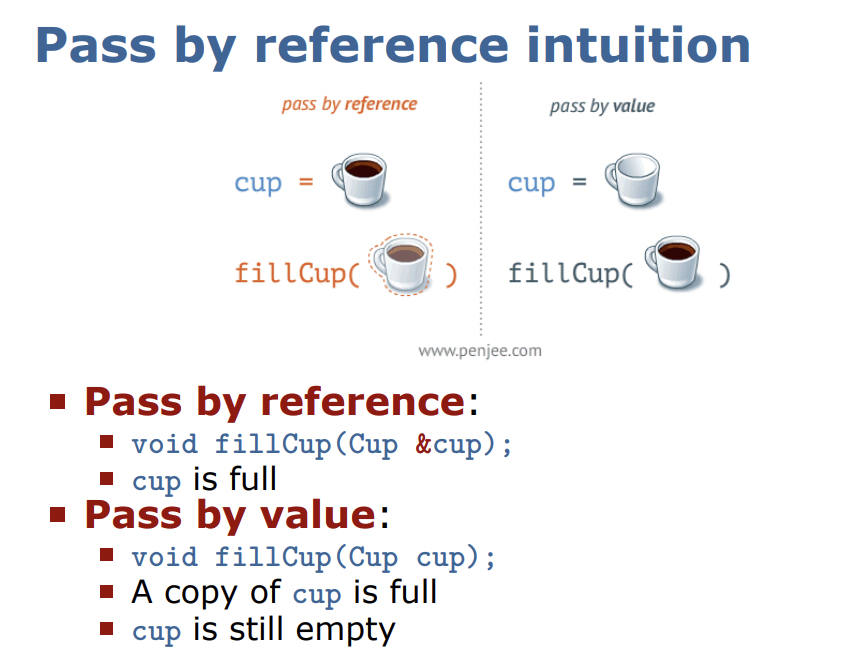


In [51]:
%%writefile test.cpp
#include <string>
#include <vector>
#include <iostream>
using namespace std; 


int Addition1(int addition) { 
    int a = addition + 10; 
    return a; 
}


int Addition2(const int &addition) { 
    int a = addition + 10; 
    return a; 
}


int Addition3(const int *addition) { 
    int a = *addition + 10; 
    return a; 
}

int main() {
 
 int b = 10; 
 std::cout << Addition1(b) << std::endl; 
 std::cout << Addition2(b) << std::endl; 
 std::cout << Addition3(&b) << std::endl; 

 return 0; 
 }

Overwriting test.cpp


In [52]:
%%shell
g++ test.cpp -o test

In [62]:
%%shell 
./test
rm test*

20
20
20


## Using CMake 
- allows structuring large projects, their libraries and the compilation process
- is like a cook book for the compiler 
- includes .cpp and header files, links libraries (linking is connecting compiled binaries with the function call that we may use )
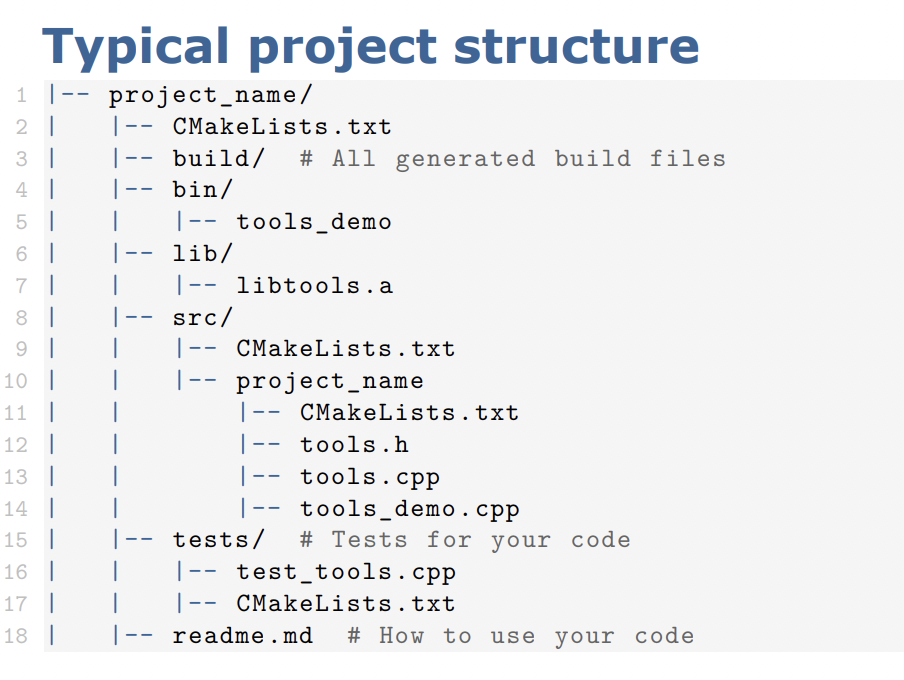

In [122]:
%%writefile first_project/src/test.cpp 
#include <iostream >
#include "tools.h"
 void MakeItRain () {
 #important weather manipulation code
 std :: cout << "Here! Now it rains! Happy?\n";
 }
 void MakeItSunny () { std :: cerr << "Not available\n"; }

Overwriting first_project/src/test.cpp


In [104]:
%%writefile first_project/src/main.cpp 
int main () {
MakeItRain ();
MakeItSunny ();
return 0;
}

Overwriting first_project/src/main.cpp


In [119]:
%%writefile first_project/CMakeLists.txt 
set(PROJECT_SOURCE_DIR '/content/first_project/')
project(first_project) # Mandatory.
cmake_minimum_required(VERSION 3.1) # Mandatory.
set( CMAKE_CXX_STANDARD 11) # Use c++11.
# tell cmake to output binaries here:
set( EXECUTABLE_OUTPUT_PATH ${PROJECT_SOURCE_DIR}/bin)
set( LIBRARY_OUTPUT_PATH ${PROJECT_SOURCE_DIR}/lib)
# tell cmake where to look for *.h files
include_directories(${PROJECT_SOURCE_DIR}/src)
# create library "libtools"
add_library(tools /content/first_project/src/tools.cpp)
# add executable main
add_executable(main src/main.cpp)
# tell the linker to bind these objects together
target_link_libraries(main tools)

Overwriting first_project/CMakeLists.txt


In [120]:
%%shell 
cd first_project/
mkdir build
cd build

mkdir: cannot create directory ‘build’: File exists


#[Classes](http://www.cplusplus.com/doc/tutorial/classes/)
Classes are an expanded concept of data structures: like data structures, they can contain data members, but they can also contain functions as members.

An object is an instantiation of a class. In terms of variables, a class would be the type, and an object would be the variable.


In [182]:
%%writefile class.cpp
#include <iostream>
#include <string>
using namespace std; 
class Student {
 public:
 Student(int id , string name): id_{id}, name_{name} {}
 int getId() const { return id_; }
 const string& getName () const { return name_; }
 private:
 int id_;
 string name_;
};

int main(int argc, char *argv[]){
   Student studi = Student(5,"Name"); 
   std::cout << studi.getId() << std::endl;    
   return 0; 
}


Overwriting class.cpp


In [183]:
%%shell
g++ class.cpp -o class
./class


5


#[Namespaces](https://www.cplusplus.com/doc/oldtutorial/namespaces/)
Namespaces allow to group entities like classes, objects and functions under a name. This way the global scope can be divided in "sub-scopes", each one with its own name.

In [170]:
%%writefile namespace.cpp
#include <iostream>
namespace fun {
int GetMeaningOfLife () { return 42; }
} 

namespace boring {
int GetMeaningOfLife () { return 0; }
 } // namespace boring

 int main () {
 std :: cout << "The answer to everything is not "
 << boring :: GetMeaningOfLife () << " but "
 << fun :: GetMeaningOfLife () << std :: endl;
 return 0;
 }

Writing namespace.cpp


In [171]:
%%shell
g++ namespace.cpp -o namespace
./namespace


The answer to everything is not 0 but 42


##[Maps](https://www.cplusplus.com/reference/map/map/) 
Maps are associative containers that store elements formed by a combination of a key value and a mapped value, following a specific order.

In a map, the key values are generally used to sort and uniquely identify the elements, while the mapped values store the content associated to this key. The types of key and mapped value may differ, and are grouped together in member type value_type, which is a pair type combining both:
```c++
typedef pair<const Key, T> value_type;
```

In [123]:
%%writefile map.cpp
#include <iostream>
#include <map>
using namespace std;

int main()
{  map<string,int> age;
   age["PersonA"]= 41;
   age["PersonB"]= 80;
   age["PersonC"]= 25;

   if(age.find("PersonC")!= age.end())
   {
       cout << "Found PersonC" << endl;

   }

   else
   {
       cout << "Key not found" << endl;
   }
   age.insert(make_pair("PersonC",20));
   for(map<string,int>::iterator it = age.begin();it!=age.end(); it++)
   {   pair <string,int> ages = *it;
       cout << ages.first << ":" << ages.second << endl;
   }

   for(map<string,int>::iterator it = age.begin();it!=age.end(); it++)
   {
       cout << it ->first << ":" << it-> second << endl;
   }


}

Writing map.cpp


In [124]:
%%shell
g++ map.cpp -o map
./map


Found PersonC
PersonA:41
PersonB:80
PersonC:25
PersonA:41
PersonB:80
PersonC:25


##[Sets](https://www.cplusplus.com/reference/set/set/)

Sets are containers that store unique elements following a specific order.

In a set, the value of an element also identifies it (the value is itself the key, of type T), and each value must be unique. The value of the elements in a set cannot be modified once in the container (the elements are always const), but they can be inserted or removed from the container.

Internally, the elements in a set are always sorted following a specific strict weak ordering criterion indicated by its internal comparison object (of type Compare).

set containers are generally slower than unordered_set containers to access individual elements by their key, but they allow the direct iteration on subsets based on their order.

Sets are typically implemented as binary search trees.

In [137]:
%%writefile sets.cpp
#include <iostream>
#include <set>

using namespace std;

class Test
{
private:
    string name;
    int id;
public:
    Test(int id, string name):id(id),name(name){
    }
    void print() const {


cout << name <<"=" << id << endl;}

    bool operator <(const Test &other) const
    {
        return name < other.name;
    }

};


int main()
{    set <float> numbers;
    numbers.insert(10);
   numbers.insert(20);
    numbers.insert(30);



    for(set <float>::iterator it= numbers.begin(); it!=numbers.end();it++ )
      {
        cout << *it << endl;

      }


      set <float>::iterator itfind = numbers.find(30);

      if(itfind!=numbers.end())
      {
          cout << "Found:" << *itfind << endl;
      }
     if(numbers.count(30)==1)
      {
        cout << "Number found woohoo:" << *itfind << endl;
      }

      set<Test> tests;


         for(set <Test>::iterator it= tests.begin(); it!=tests.end();it++ )
      {
        it->print();

      }


    return 0;
}

Overwriting sets.cpp


In [138]:
%%shell
g++ sets.cpp -o sets
./sets


10
20
30
Found:30
Number found woohoo:30


# [Templates](http://www.cplusplus.com/doc/oldtutorial/templates/)
Function templates are special functions that can operate with generic types. This allows us to create a function template whose functionality can be adapted to more than one type or class without repeating the entire code for each type.

In C++ this can be achieved using template parameters. A template parameter is a special kind of parameter that can be used to pass a type as argument: just like regular function parameters can be used to pass values to a function, template parameters allow to pass also types to a function. These function templates can use these parameters as if they were any other regular type.


In [164]:
%%writefile template.cpp
#include <iostream>

using namespace std;

template<class T>

class Test{
private:
    T obj;
public:
    Test(T obj) : obj(obj) {}

    void print()
    { cout << obj << endl;

    }

};

int main()
{
    Test<string> h("hello");
    Test<double> b(3.5);
    h.print();
    b.print();
 

    return 0;
}

Overwriting template.cpp


In [165]:
%%shell 
g++ template.cpp -o template
./template

hello
3.5


#[Function Overloading/Overriding](https://www.geeksforgeeks.org/function-overloading-c/#:~:text=Function%20overloading%20is%20a%20feature,the%20arguments%20should%20be%20different.)
Function overloading is a feature in C++ where two or more functions can have the same name but different parameters.

When a function name is overloaded with different jobs it is called Function Overloading.

In Function Overloading “Function” name should be the same and the arguments should be different.



In [168]:
%%writefile overload.cpp
#include <iostream>
using std :: cout; using std :: endl;
class Rectangle {
 public:
 Rectangle (int w, int h) : width_{w}, height_{h} {}
 int width () const { return width_; }
 int height () const { return height_; }
 protected:
 int width_ = 0;
 int height_ = 0;
 };
 class Square : public Rectangle {
 public:
 explicit Square(int size) : Rectangle {size , size} {}
 };
 int main () {
 Square sq (10); // Short name to save space.
 cout << sq.width () << " " << sq.height () << endl;
 return 0;
 }

Overwriting overload.cpp


In [169]:
%%shell
g++ overload.cpp -o overload
./overload


10 10


## [Function Pointers](https://www.cprogramming.com/tutorial/function-pointers.html)

A function pointer is a variable that stores the address of a function that can later be called through that function pointer. This is useful because functions encapsulate behavior. For instance, every time you need a particular behavior such as drawing a line, instead of writing out a bunch of code, all you need to do is call the function. But sometimes you would like to choose different behaviors at different times in essentially the same piece of code. Read on for concrete examples.

In [126]:
%%writefile functionpointer.cpp
#include <iostream>

using namespace std;

void Print(int d)  {
cout << "Hello world!" << d << endl;
}

void calc(float a,float b,float *c)  {

*c = a+b;

}

int main()
{   int d = 3;
float a = 1.2;
float b = 5.4;
float x;

    void (*Ptest)(int);
    void (*calculate)(float,float,float*) = calc;


    Ptest = &Print;


    (*Ptest)(d);
    (*calculate)(a,b,&x);
    cout << x << endl;

    return 0;
}

Writing functionpointer.cpp


In [127]:
%%shell
g++ functionpointer.cpp -o functionpointer
./functionpointer


Hello world!3
6.6
